## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)

    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________




In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/500





50000/50000 [==============================] - 8s 160us/step - loss: 2.2596 - acc: 0.1507 - val_loss: 2.2148 - val_acc: 0.1926
Epoch 2/500
50000/50000 [==============================] - 6s 123us/step - loss: 2.1816 - acc: 0.2136 - val_loss: 2.1540 - val_acc: 0.2359
Epoch 3/500
50000/50000 [==============================] - 6s 120us/step - loss: 2.1269 - acc: 0.2492 - val_loss: 2.1041 - val_acc: 0.2663
Epoch 4/500
50000/50000 [==============================] - 7s 133us/step - loss: 2.0818 - acc: 0.2706 - val_loss: 2.0629 - val_acc: 0.2824
Epoch 5/500
50000/50000 [==============================] - 7s 140us/step - loss: 2.0445 - acc: 0.2823 - val_loss: 2.0295 - val_acc: 0.2946
Epoch 6/500
50000/50000 [==============================] - 8s 153us/step - loss: 2.0133 - acc: 0.2956 - val_loss: 2.0008 - val_acc: 0.3013
Epoch 7/500
50

50000/50000 [==============================] - 6s 112us/step - loss: 1.7001 - acc: 0.4078 - val_loss: 1.7042 - val_acc: 0.4107
Epoch 47/500
50000/50000 [==============================] - 6s 112us/step - loss: 1.6963 - acc: 0.4085 - val_loss: 1.7021 - val_acc: 0.4083
Epoch 48/500
50000/50000 [==============================] - 6s 112us/step - loss: 1.6929 - acc: 0.4102 - val_loss: 1.6986 - val_acc: 0.4120
Epoch 49/500
50000/50000 [==============================] - 6s 112us/step - loss: 1.6892 - acc: 0.4117 - val_loss: 1.6937 - val_acc: 0.4132
Epoch 50/500
50000/50000 [==============================] - 6s 112us/step - loss: 1.6857 - acc: 0.4130 - val_loss: 1.6919 - val_acc: 0.4115
Epoch 51/500
50000/50000 [==============================] - 6s 112us/step - loss: 1.6825 - acc: 0.4145 - val_loss: 1.6873 - val_acc: 0.4123
Epoch 52/500
50000/50000 [==============================] - 6s 112us/step - loss: 1.6789 - acc: 0.4154 - val_loss: 1.6849 - val_acc: 0.4165
Epoch 53/500
50000/50000 [=======

50000/50000 [==============================] - 6s 112us/step - loss: 1.5434 - acc: 0.4634 - val_loss: 1.5654 - val_acc: 0.4534
Epoch 105/500
50000/50000 [==============================] - 6s 113us/step - loss: 1.5412 - acc: 0.4651 - val_loss: 1.5617 - val_acc: 0.4536
Epoch 106/500
50000/50000 [==============================] - 6s 113us/step - loss: 1.5392 - acc: 0.4646 - val_loss: 1.5617 - val_acc: 0.4501
Epoch 107/500
50000/50000 [==============================] - 6s 112us/step - loss: 1.5372 - acc: 0.4650 - val_loss: 1.5625 - val_acc: 0.4497
Epoch 108/500
50000/50000 [==============================] - 6s 112us/step - loss: 1.5352 - acc: 0.4665 - val_loss: 1.5600 - val_acc: 0.4478
Epoch 109/500
50000/50000 [==============================] - 6s 112us/step - loss: 1.5331 - acc: 0.4673 - val_loss: 1.5582 - val_acc: 0.4511
Epoch 110/500
50000/50000 [==============================] - 6s 112us/step - loss: 1.5310 - acc: 0.4670 - val_loss: 1.5536 - val_acc: 0.4551
Epoch 111/500
50000/50000 [

50000/50000 [==============================] - 6s 112us/step - loss: 1.4391 - acc: 0.4989 - val_loss: 1.4862 - val_acc: 0.4762
Epoch 163/500
50000/50000 [==============================] - 6s 113us/step - loss: 1.4377 - acc: 0.4998 - val_loss: 1.4861 - val_acc: 0.4699
Epoch 164/500
50000/50000 [==============================] - 6s 112us/step - loss: 1.4359 - acc: 0.4998 - val_loss: 1.4879 - val_acc: 0.4720
Epoch 165/500
50000/50000 [==============================] - 6s 112us/step - loss: 1.4345 - acc: 0.5005 - val_loss: 1.4824 - val_acc: 0.4767
Epoch 166/500
50000/50000 [==============================] - 6s 112us/step - loss: 1.4325 - acc: 0.5021 - val_loss: 1.4842 - val_acc: 0.4781
Epoch 167/500
50000/50000 [==============================] - 6s 112us/step - loss: 1.4311 - acc: 0.5010 - val_loss: 1.4839 - val_acc: 0.4714
Epoch 168/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.4298 - acc: 0.5020 - val_loss: 1.4791 - val_acc: 0.4752
Epoch 169/500
50000/50000 [

50000/50000 [==============================] - 6s 118us/step - loss: 1.3549 - acc: 0.5283 - val_loss: 1.4327 - val_acc: 0.4942
Epoch 221/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.3536 - acc: 0.5279 - val_loss: 1.4411 - val_acc: 0.4865
Epoch 222/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.3517 - acc: 0.5288 - val_loss: 1.4310 - val_acc: 0.4945
Epoch 223/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.3508 - acc: 0.5280 - val_loss: 1.4334 - val_acc: 0.4943
Epoch 224/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.3497 - acc: 0.5302 - val_loss: 1.4270 - val_acc: 0.4941
Epoch 225/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.3484 - acc: 0.5301 - val_loss: 1.4307 - val_acc: 0.4906
Epoch 226/500
50000/50000 [==============================] - 6s 120us/step - loss: 1.3473 - acc: 0.5304 - val_loss: 1.4265 - val_acc: 0.4965
Epoch 227/500
50000/50000 [

50000/50000 [==============================] - 6s 123us/step - loss: 1.2811 - acc: 0.5542 - val_loss: 1.3974 - val_acc: 0.5012
Epoch 279/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.2795 - acc: 0.5548 - val_loss: 1.4060 - val_acc: 0.4955
Epoch 280/500
50000/50000 [==============================] - 10s 191us/step - loss: 1.2779 - acc: 0.5549 - val_loss: 1.3914 - val_acc: 0.5091
Epoch 281/500
50000/50000 [==============================] - 13s 265us/step - loss: 1.2775 - acc: 0.5559 - val_loss: 1.3927 - val_acc: 0.5088
Epoch 282/500
50000/50000 [==============================] - 12s 243us/step - loss: 1.2755 - acc: 0.5555 - val_loss: 1.4008 - val_acc: 0.5042
Epoch 283/500
50000/50000 [==============================] - 13s 256us/step - loss: 1.2742 - acc: 0.5557 - val_loss: 1.4133 - val_acc: 0.5030
Epoch 284/500
50000/50000 [==============================] - 13s 253us/step - loss: 1.2737 - acc: 0.5557 - val_loss: 1.4103 - val_acc: 0.5041
Epoch 285/500
50000/50

50000/50000 [==============================] - 8s 152us/step - loss: 1.2129 - acc: 0.5787 - val_loss: 1.3703 - val_acc: 0.5123
Epoch 337/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.2117 - acc: 0.5799 - val_loss: 1.3617 - val_acc: 0.5172
Epoch 338/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.2099 - acc: 0.5784 - val_loss: 1.3605 - val_acc: 0.5179
Epoch 339/500
50000/50000 [==============================] - 6s 113us/step - loss: 1.2084 - acc: 0.5790 - val_loss: 1.3610 - val_acc: 0.5144
Epoch 340/500
50000/50000 [==============================] - 6s 113us/step - loss: 1.2074 - acc: 0.5801 - val_loss: 1.3681 - val_acc: 0.5123
Epoch 341/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.2065 - acc: 0.5798 - val_loss: 1.3627 - val_acc: 0.5150
Epoch 342/500
50000/50000 [==============================] - 6s 113us/step - loss: 1.2055 - acc: 0.5805 - val_loss: 1.3578 - val_acc: 0.5184
Epoch 343/500
50000/50000 [

50000/50000 [==============================] - 6s 116us/step - loss: 1.1479 - acc: 0.5993 - val_loss: 1.3759 - val_acc: 0.5124
Epoch 395/500
50000/50000 [==============================] - 7s 146us/step - loss: 1.1463 - acc: 0.6017 - val_loss: 1.3430 - val_acc: 0.5248
Epoch 396/500
50000/50000 [==============================] - 8s 164us/step - loss: 1.1449 - acc: 0.6023 - val_loss: 1.3470 - val_acc: 0.5235
Epoch 397/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.1452 - acc: 0.6009 - val_loss: 1.3670 - val_acc: 0.5160
Epoch 398/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.1433 - acc: 0.6034 - val_loss: 1.3625 - val_acc: 0.5198
Epoch 399/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.1422 - acc: 0.6029 - val_loss: 1.3714 - val_acc: 0.5139
Epoch 400/500
50000/50000 [==============================] - 7s 136us/step - loss: 1.1420 - acc: 0.6025 - val_loss: 1.3463 - val_acc: 0.5236
Epoch 401/500
50000/50000 [

50000/50000 [==============================] - 7s 136us/step - loss: 1.0876 - acc: 0.6216 - val_loss: 1.3331 - val_acc: 0.5286
Epoch 453/500
50000/50000 [==============================] - 6s 123us/step - loss: 1.0851 - acc: 0.6227 - val_loss: 1.3507 - val_acc: 0.5216
Epoch 454/500
50000/50000 [==============================] - 6s 128us/step - loss: 1.0845 - acc: 0.6240 - val_loss: 1.3505 - val_acc: 0.5213
Epoch 455/500
50000/50000 [==============================] - 6s 120us/step - loss: 1.0862 - acc: 0.6215 - val_loss: 1.3790 - val_acc: 0.5111
Epoch 456/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.0833 - acc: 0.6241 - val_loss: 1.3612 - val_acc: 0.5166
Epoch 457/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.0805 - acc: 0.6249 - val_loss: 1.3849 - val_acc: 0.5047
Epoch 458/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.0797 - acc: 0.6251 - val_loss: 1.3807 - val_acc: 0.5167
Epoch 459/500
50000/50000 [

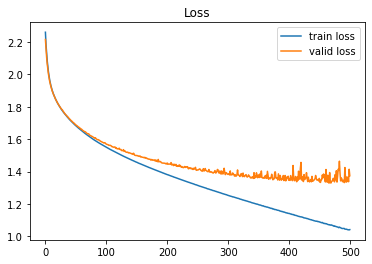

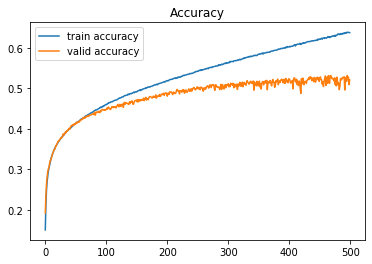

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()